# JVT Tests

As of [March $12^{th}$](https://indico.cern.ch/event/804427/contributions/3346566/attachments/1810379/2956384/FTagPlenaryIntro20190312.pdf), Jet-$E_T$ Miss has a new recommendation for the JVT cut that we should be applying for pflow jets.

The previous recommendation was 0.2, whereas now they recommend that we use 0.5.

Note, when we were doing some initial studies on EMTopo vs PFlow jets, we were using the same JVT cut for EMTopo of 0.59. But it was hard to get the PFlow model to be as performant as the EMTopo model.  The looser JVT cut made it easier for the PFlow model to throw out the crappy jets, so I'm a little dubious on how this new JVT cut will impact our retraining conclusions.

For these studies, I want to start from the .h5 files produced by the training-dataset-dumper, so that I also have an opportunity to validate the roc curves that are being produced by my lwtnn file with the new track selections!

In [1]:
import h5py
import pandas as pd
import sys
sys.path.append("../..")
from trainNet import *
import xarray as xr
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
fname = "../../../training-dataset-dumper/ttbar_noJVT_pflow.h5"
f = h5py.File(fname,'r')
jet_np = f['jets'][:]
f.close()

pflow_df = pd.DataFrame(jet_np)

fname = "../../../training-dataset-dumper/ttbar_noJVT_topo.h5"
f = h5py.File(fname,'r')
jet_np = f['jets'][:]
f.close()

topo_df = pd.DataFrame(jet_np)

In [3]:
for c in pflow_df:
    print(c)

MV2c10_discriminant
MV2r_discriminant
MV2rmu_discriminant
DL1_pu
DL1_pc
DL1_pb
DL1r_pu
DL1r_pc
DL1r_pb
DL1rmu_pu
DL1rmu_pc
DL1rmu_pb
IP2D_pu
IP2D_pc
IP2D_pb
IP3D_pu
IP3D_pc
IP3D_pb
SV1_pu
SV1_pc
SV1_pb
rnnip_pu
rnnip_pc
rnnip_pb
rnnip_ptau
pt_uncalib
eta_uncalib
abs_eta_uncalib
IP2D_cu
IP2D_bu
IP2D_bc
IP3D_cu
IP3D_bu
IP3D_bc
secondaryVtx_m
secondaryVtx_E
secondaryVtx_EFrac
secondaryVtx_min_trk_flightDirRelEta
secondaryVtx_max_trk_flightDirRelEta
secondaryVtx_avg_trk_flightDirRelEta
min_trk_flightDirRelEta
max_trk_flightDirRelEta
avg_trk_flightDirRelEta
SMT_discriminant
JetFitter_energyFraction
JetFitter_mass
JetFitter_significance3d
JetFitter_deltaphi
JetFitter_deltaeta
JetFitter_massUncorr
JetFitter_dRFlightDir
SV1_masssvx
SV1_efracsvx
SV1_significance3d
SV1_dstToMatLay
SV1_deltaR
SV1_Lxy
SV1_L3d
softMuon_pt
softMuon_dR
softMuon_eta
softMuon_phi
softMuon_qOverPratio
softMuon_momentumBalanceSignificance
softMuon_scatteringNeighbourSignificance
softMuon_pTrel
softMuon_ip3dD0
softMuon_ip

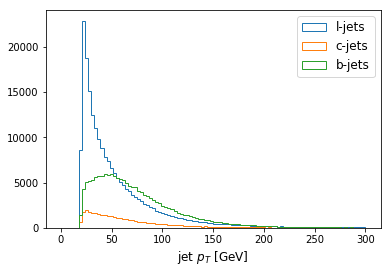

In [3]:
for pdg,flav in zip([0,4,5],['l','c','b']):
    mask = (pflow_df.HadronConeExclTruthLabelID == pdg) & (pflow_df.bTagJVT > 0.5)
    plt.hist(pflow_df.pt[mask] / 1000, bins=100, range=(0,300),
             histtype='step', label=flav+'-jets')

plt.xlabel('jet $p_T$ [GeV]', fontsize=12)
plt.legend(fontsize=12)
    
plt.show()

Note, at this point the jet $p_T$ has not yet been scaled to GeV.

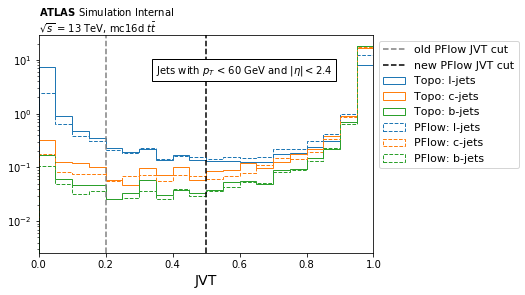

In [4]:
for df, jetCollection, l in zip([topo_df,pflow_df],['Topo','PFlow'],['-','--']):
    
    JVT_mask = (df.pt / 1000 < 60) & (df.eta < 2.4) 
    
    for pdg,flav,c in zip([0,4,5], ['l','c','b'], ['C0','C1','C2']):

        m = (df.HadronConeExclTruthLabelID == pdg) & JVT_mask
        plt.hist(df.bTagJVT[m],bins=20, range=(0,1), color=c,
                 label=jetCollection+': '+flav+'-jets', linestyle=l,
                 histtype='step', density=True,log=True)

old_cut = 0.2
new_cut = 0.5
    
ylim = plt.ylim()
plt.plot([old_cut]*2,ylim,color='grey',linestyle='--',label='old PFlow JVT cut')
plt.plot([new_cut]*2,ylim,color='black',linestyle='--',label='new PFlow JVT cut')
plt.ylim(ylim)
plt.xlim(0,1)

text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+=r"$\sqrt{s}$ = 13 TeV, mc16d $t\bar{t}$"
plt.text(0,1.1*ylim[1],text)

plt.text(.35, 0.2*ylim[1], "Jets with $p_T$ < 60 GeV and $|\eta| < 2.4$",
         bbox=dict(facecolor='white', edgecolor='black'))

plt.legend(loc='upper left',fontsize=11,bbox_to_anchor=(1,1),)    
plt.xlabel('JVT',fontsize=14)
plt.savefig('../../figures/mc16d_Topo_ttbar/JVT.pdf',
            bbox_inches='tight')
plt.show()

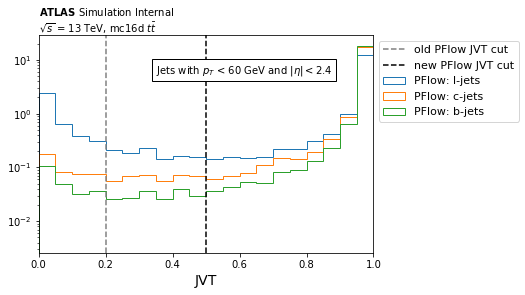

In [5]:
# Also make the plot just for pflow - df now corresponds to pflow_df
    
for pdg,flav,c in zip([0,4,5], ['l','c','b'], ['C0','C1','C2']):

    m = (df.HadronConeExclTruthLabelID == pdg) & JVT_mask
    plt.hist(df.bTagJVT[m],bins=20, range=(0,1), color=c,
             label=jetCollection+': '+flav+'-jets', linestyle='-',
             histtype='step', density=True,log=True)

old_cut = 0.2
new_cut = 0.5
    
ylim = plt.ylim()
plt.plot([old_cut]*2,ylim,color='grey',linestyle='--',label='old PFlow JVT cut')
plt.plot([new_cut]*2,ylim,color='black',linestyle='--',label='new PFlow JVT cut')
plt.ylim(ylim)
plt.xlim(0,1)

text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+=r"$\sqrt{s}$ = 13 TeV, mc16d $t\bar{t}$"
plt.text(0,1.1*ylim[1],text)

plt.text(.35, 0.2*ylim[1], "Jets with $p_T$ < 60 GeV and $|\eta| < 2.4$",
         bbox=dict(facecolor='white', edgecolor='black'))

plt.legend(loc='upper left',fontsize=11,bbox_to_anchor=(1,1),)    
plt.xlabel('JVT',fontsize=14)
plt.savefig('../../figures/mc16d_PFlow_ttbar/JVT.pdf',
            bbox_inches='tight')
plt.show()

In [6]:
topo_df.index.shape[0]

222320

In [7]:
pflow_df.index.shape[0]

472045

So, the requirements to create a pflow jet are a bit more stringent than the requirements to make a topo jet.

### Question 

How many pflow jets of each flavor do we have getting thrown out by the old and new JVT cuts?

In [8]:
JVT_cuts = [0.2, 0.5, 0.59]
JVT_cols = ['JVT < {}'.format(i) for i in JVT_cuts]
pflow_cut = pd.DataFrame(0, columns=JVT_cols, 
                         index=['l-jets','c-jets','b-jets'])

In [9]:
for pdg,flav in zip([0,4,5], ['l','c','b']):
    
    key = flav + '-jets'
    mask = (pflow_df.pt / 1000 < 60) & (pflow_df.eta < 2.4) & (pflow_df.HadronConeExclTruthLabelID == pdg)
    
    for JVT_cut in JVT_cuts:
    
        pflow_cut.loc[key,'JVT < {}'.format(JVT_cut)] = np.sum(mask & (pflow_df.bTagJVT < JVT_cut)) / mask.shape[0] # np.sum(mask)#
    

In [10]:
print('Fraction of pflow jets that are eliminated')
pflow_cut.round(3)

Fraction of pflow jets that are eliminated


JVT < 0.2  JVT < 0.5  JVT < 0.59
l-jets      0.075      0.097       0.102
c-jets      0.001      0.002       0.002
b-jets      0.002      0.003       0.004

**Follow-up:** How does this compare to Topo jets?

In [11]:
JVT_cut = 0.59
topo_cut = pd.DataFrame(0, columns=['JVT < {}'.format(JVT_cut)], 
                        index=['l-jets','c-jets','b-jets'])

for pdg,flav in zip([0,4,5], ['l','c','b']):
    
    key = flav + '-jets'
    mask = (topo_df.pt / 1000 < 60) & (topo_df.eta < 2.4) & (topo_df.HadronConeExclTruthLabelID == pdg)
    
    topo_cut.loc[key,'JVT < {}'.format(JVT_cut)] = np.sum(mask & (topo_df.bTagJVT < JVT_cut)) / mask.shape[0]
  
print('Fraction of topo jets that are eliminated')
topo_cut.round(3)

Fraction of topo jets that are eliminated


JVT < 0.59
l-jets       0.254
c-jets       0.002
b-jets       0.004

**Conclusion:**  The JVT cut for EMTopo is actually a lot *tighter* than the JVT cut for PFlow jets.

I'm not sure how this is related to the performance studies, but I can revisit this afterwards too!


### Compare the pflow RNN performance for the JVT cuts 

In [12]:
preds = pflow_df[['iprnn_pu', 'iprnn_pc', 'iprnn_pb']]

In [13]:
preds.head()

iprnn_pu  iprnn_pc  iprnn_pb
0  0.000008  0.006055  0.993938
1  0.003308  0.009477  0.987215
2  0.908966  0.065107  0.025927
3  0.001221  0.023712  0.975067
4  0.000116  0.038386  0.961499

In [14]:
fc = 0.07
disc = np.log(np.divide(pflow_df['iprnn_pb'], fc*pflow_df['iprnn_pc'] + (1 - fc) * pflow_df['iprnn_pu']))

In [15]:
from plottingFcts import calculateEff, plotROCRatio,sigBkgEff,btagROC

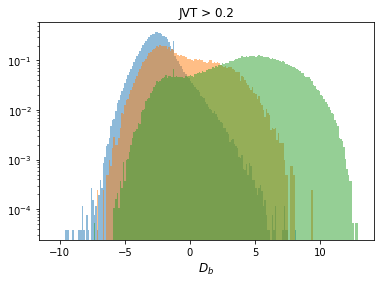

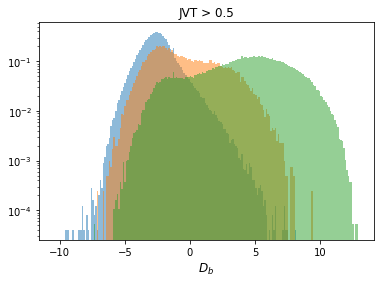

In [16]:
effs = {'l':[], 'c':[], 'b':[]}

discMax = np.max(disc)
discMin = np.min(disc)

myRange=(discMin,discMax)
nBins = 200

for JVT_cut in [0.2,0.5]:

    plt.figure()
    for pdg, flav in zip([0,4,5], ['l','c','b']):

        mask = (pflow_df.bTagJVT > JVT_cut) & (pflow_df.HadronConeExclTruthLabelID == pdg)
        var = np.copy(disc[mask])
        n,edges,_ = plt.hist(var, label='pdg {}'.format(pdg),density=True,
                         log=True,alpha=0.5, bins=nBins,range=myRange)

        eff = calculateEff(n)
        effs[flav].append(eff)
    
    plt.xlabel('$D_b$',fontsize=12)
    plt.title('JVT > {}'.format(JVT_cut))
    plt.savefig('../../figures/mc16d_PFlow_ttbar/disc_JVT_cut_{}.pdf'.format(JVT_cut),
                bbox_inches='tight')
    
    plt.show()

In [23]:
Ntest = [np.sum((pflow_df.bTagJVT > JVT_cut) & (pflow_df.HadronConeExclTruthLabelID == pdg)) for pdg in [0,4,5]]

In [24]:
Ntest

[211911, 34604, 158804]

../../plottingFcts.py:595: RuntimeWarning: invalid value encountered in sqrt
  eff_err = lambda x, N: np.sqrt( x*(1-x) / N)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: invalid value encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)


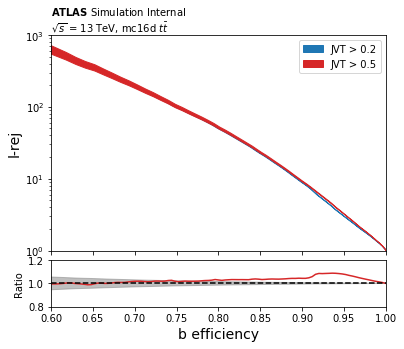

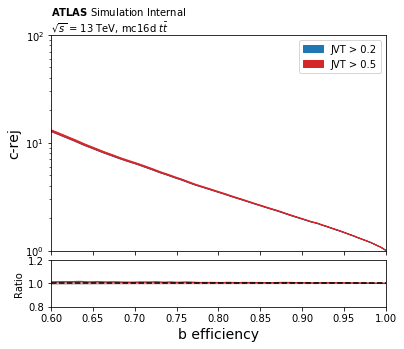

In [25]:
figDir = "../../figures/"
subDir = 'mc16d_PFlow_ttbar'
plotTag = "_newJVT"

colors = ['C0','C3']
labels = ['JVT > {}'.format(JVT_cut) for JVT_cut in JVT_cuts]

plotROCRatio(effs['b'], effs['l'], labels, rrange=(0.8,1.2),ymax=1000,
             text=text,ylabel='l-rej',binomialErrors=True,nTest=Ntest, 
             colors=colors, figDir=figDir,subDir=subDir,tag='l'+plotTag)

plotROCRatio(effs['b'], effs['c'], labels, rrange=(0.8,1.2),ymax=100,
             text=text,ylabel='c-rej',binomialErrors=True,nTest=Ntest, 
             colors=colors, figDir=figDir,subDir=subDir,tag='c'+plotTag)


In [19]:
nTrks = 15
subDir = 'mc16d_PFlow_ttbar/dl1_files'
dataDir = '../../data/'+subDir
vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"
dataTagTest = "90ktest_{}trks_{}_sd0_rev_hybrid_5TeV_scale".format(nTrks,vStr)

f_name = "{}/data_{}.hdf5".format(dataDir,dataTagTest)

f = h5py.File(f_name,"r")
    
X = f['X_test'][:]
y = f['y_test'][:]
ix = f['ix_test'][:]

f.close()

#Ntest, nTrks, nFeatures = X.shape

In [20]:
modelDir = "../../models/mc16d_PFlow_hybrid_5TeV"
nHidden=400
dataTagTrain = "5mtrain_15trks_{}_sd0_rev".format(vStr)
m = myLSTM(modelDir=modelDir, nFeatures=nFeatures, nHidden=nHidden, 
           dataTag=dataTagTrain, loadModel=True)

Initialize method from myModel()
Loading previously trained LSTM


In [21]:
leff, ceff, beff = sigBkgEff(m, X[pflow_df.bTagJVT > JVT_cut], y[pflow_df.bTagJVT > JVT_cut], ix[pflow_df.bTagJVT > JVT_cut],
                             figDir='../../figures',subDir='mc16d_PFlow_ttbar',
                             tag='_train-dataset-dumper')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 94145 but corresponding boolean dimension is 472045

In [ ]:
btagROC([beff],[leff],[ceff],['test w/ my setup'])